## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [4]:
your_name = "Fraser Howard"
your_student_id = "47805145"

In [5]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')



 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [7]:
cars=pd.read_csv('car_sell.csv')

#Q1 Part A
#Before Removing the missing Data:
#Viewing the Dataframe
print(cars.head())

#Counting Number of Null Values
null_counts_before = cars.isnull().sum()
print(null_counts_before)

#Length of the data
length_before = len(cars)
print("Length of cars_sell data:" , length_before)

cars.info()

   Unnamed: 0                      name    year  selling_price  km_driven  \
0           0             Maruti 800 AC  2007.0          60000      70000   
1           1  Maruti Wagon R LXI Minor  2007.0         135000      50000   
2           2      Hyundai Verna 1.6 SX  2012.0         600000     100000   
3           3    Datsun RediGO T Option  2017.0         250000      46000   
4           4     Honda Amaze VX i-DTEC  2014.0         450000     141000   

     fuel seller_type transmission         owner  
0  Petrol  Individual       Manual   First Owner  
1  Petrol  Individual       Manual   First Owner  
2  Diesel  Individual       Manual   First Owner  
3  Petrol  Individual       Manual   First Owner  
4  Diesel  Individual       Manual  Second Owner  
Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64
Length of cars_sell data: 434

In [8]:
#Q1 Part B:

#Removing the Data:
cars.dropna(subset=['year'], inplace=True)     
cars=cars.drop(cars[cars['fuel'] == 'none'].index)


#Viewing the Dataframe
print(cars.shape[0])

#Counting Number of Null Values
null_counts_after = cars.isnull().sum()
print(null_counts_after)

#Length of the data
length_after = len(cars)
print("Length of cars_sell data:" , length_after)

3886
Unnamed: 0       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
Length of cars_sell data: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [10]:
#Q2.1 Total Number of Unique Cars, Sellers, Transmission, Owner.
print("Total Number of Unique Cars:", cars['name'].nunique()) 
print("Total Number of Unique Sellers:", cars['seller_type'].nunique())
print("Total Number of Unique Transmission:", cars['transmission'].nunique())
print("Total Number of Unique Owner:", cars['owner'].nunique())


Total Number of Unique Cars: 1402
Total Number of Unique Sellers: 3
Total Number of Unique Transmission: 2
Total Number of Unique Owner: 5


In [11]:
#Q2.2 Descriptive Statistics for km_driven:
print("Total Number of kms driven:" , cars['km_driven'].sum())  
print("Mean of kms driven:" , cars['km_driven'].mean())
print("Standard deviation of kms driven:" , cars['km_driven'].std())
print("Minimum Number of kms driven:" , cars['km_driven'].min())
print("Maximum Number of kms driven:" , cars['km_driven'].max())

Total Number of kms driven: 257693403
Mean of kms driven: 66313.27920741122
Standard deviation of kms driven: 46679.603915975706
Minimum Number of kms driven: 1
Maximum Number of kms driven: 806599


In [12]:
#Q2.3a Descriptive Statistics: Relationship between Selling Price and Seller Type: Mean and Standard Deviation
print("Seller Type Mean: ", cars.groupby('seller_type')['selling_price'].mean()) 
print("Seller Type Standard Deviation: ", cars.groupby('seller_type')['selling_price'].std())

Seller Type Mean:  seller_type
Dealer              702093.314961
Individual          421169.410265
Trustmark Dealer    935797.872340
Name: selling_price, dtype: float64
Seller Type Standard Deviation:  seller_type
Dealer              813597.811832
Individual          420273.684129
Trustmark Dealer    655724.299195
Name: selling_price, dtype: float64


In [13]:
#Q2.3b Descriptive Statistics: Relationship between Selling Price and Seller Type: Max and Min
print("Seller Type Max: ", cars.groupby('seller_type')['selling_price'].max())
print("Seller Type Min: ",cars.groupby('seller_type')['selling_price'].min())

Seller Type Max:  seller_type
Dealer              8900000
Individual          4800000
Trustmark Dealer    2600000
Name: selling_price, dtype: int64
Seller Type Min:  seller_type
Dealer               22000
Individual           20000
Trustmark Dealer    315000
Name: selling_price, dtype: int64


In [14]:
#Q2.4a Descriptive Statistics: Relationship between Years Sold and Owner Type: Mean and Standard Deviation
print(cars.groupby('owner')['year'].mean()) 
print(cars.groupby('owner')['year'].std())

owner
First Owner             2014.453791
Fourth & Above Owner    2007.238806
Second Owner            2010.977000
Test Drive Car          2019.642857
Third Owner             2009.413919
Name: year, dtype: float64
owner
First Owner             3.555597
Fourth & Above Owner    5.248635
Second Owner            3.840993
Test Drive Car          0.633324
Third Owner             3.920266
Name: year, dtype: float64


In [15]:
#Q2.4b Descriptive Statistics: Relationship between Years Sold and Owner Type: Max and Min
print(cars.groupby('owner')['year'].max())
print(cars.groupby('owner')['year'].min())

owner
First Owner             2020.0
Fourth & Above Owner    2020.0
Second Owner            2019.0
Test Drive Car          2020.0
Third Owner             2019.0
Name: year, dtype: float64
owner
First Owner             1996.0
Fourth & Above Owner    1992.0
Second Owner            1995.0
Test Drive Car          2018.0
Third Owner             1997.0
Name: year, dtype: float64


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

<Figure size 1000x800 with 0 Axes>

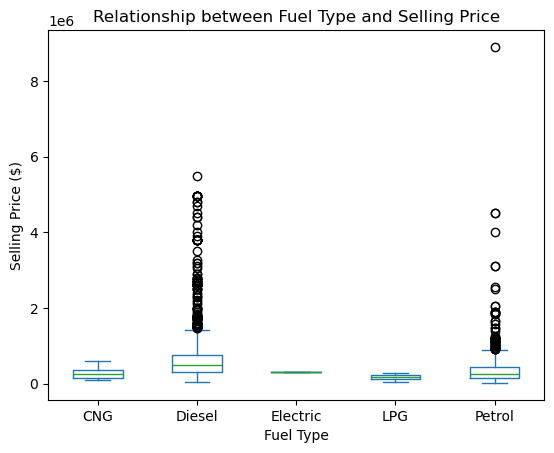

In [16]:
#Correlation 1: Fuel and Selling Price
plt.figure(figsize=(10,8))

cars.plot.box(column='selling_price', by='fuel')
plt.title("Relationship between Fuel Type and Selling Price")
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price ($)')
plt.show()

# Correlation 1: Fuel and Selling Price

## Observations and Explanations:

- **Median**: All fuel types have a similar median selling price (just above 0), with diesel slightly higher than the others.
  
- **Interquartile Range (IQR)**: The IQR for electric and LPG vehicles is much smaller compared to CNG and petrol, indicating more consistent pricing. Diesel has the largest IQR, suggesting greater variability in selling prices.

- **Skewness and Outliers**:
  - **CNG**: Positive skew, indicating that there are more low-priced CNG vehicles than high-priced ones.
  - **Diesel**: Symmetric distribution with a slight positive skew, indicating some higher-priced outliers.
  - **Electric**: Data distribution is not applicable (N/A) for analysis.
  - **LPG**: Distribution is illegible, making it difficult to assess its skewness.
  - **Petrol**: Almost symmetric distribution with a positive skew, indicating some higher-priced outliers.
  
- Numerous outliers are present for diesel and petrol fuel types, while the other fuel types exhibit fewer outliers.

## Overall Summary:

Diesel vehicles have a slightly higher median selling price than other fuel types and also exhibit the highest variability in prices. In contrast, electric and LPG vehicles show more consistent pricing patterns. The presence of frequent outliers in diesel and petrol categories indicates significant variability in their pricing, while other fuel types maintain more stable selling prices.


<Figure size 1000x800 with 0 Axes>

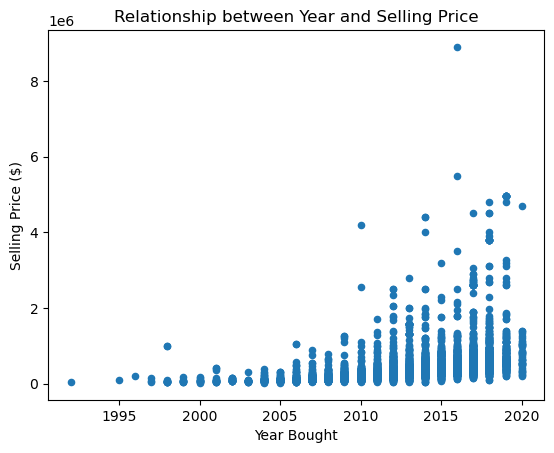

In [17]:
#Correlation 2: Year and Selling Price
plt.figure(figsize=(10,8))

cars.plot.scatter(x='year', y='selling_price')
plt.title("Relationship between Year and Selling Price")
plt.xlabel('Year Bought')
plt.ylabel('Selling Price ($)')
plt.show()

# Correlation 2: Year and Selling Price

## Overall Summary:

Without the use of a trendline, the data does not clearly infer a definitive relationship. However, upon inspection, there appears to be a positive relationship between the year and selling price, with more cars being sold at higher prices in more recent years. The clusters and spread of the data points consistently increase over time, suggesting a general upward trend. 

It's important to note that there may be two or more outliers, such as those from the years 1997 and 2016, that could affect the overall analysis. Despite these outliers, the positive relationship between year and selling price still holds, indicating that newer vehicles tend to have higher selling prices.


<Figure size 1000x800 with 0 Axes>

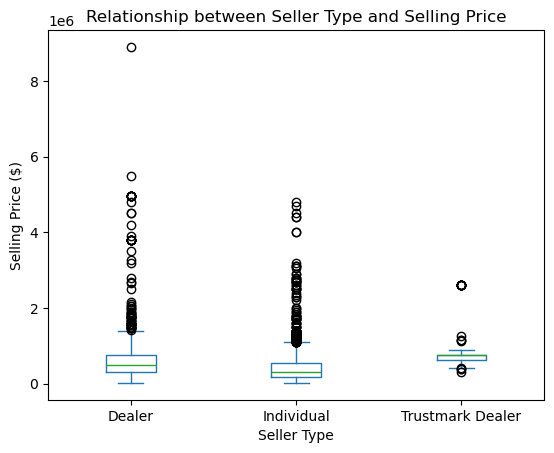

In [18]:
#Correlation 3: Seller Type and Selling Price
plt.figure(figsize=(10,8))

cars.plot.box(column='selling_price', by='seller_type')
plt.title("Relationship between Seller Type and Selling Price")
plt.xlabel('Seller Type')
plt.ylabel('Selling Price ($)')
plt.show()

# Correlation 3: Seller Type and Selling Price

## Observations and Explanations:

- **Median**: All seller types have a similar median selling price, indicating consistency across different seller categories.
  
- **Interquartile Range (IQR)**: Both Dealer and Individual sellers have similar IQRs, while Trustmark Dealer shows a very small IQR, suggesting less variability in their prices.

- **Skewness and Outliers**:
  - **Dealer**: The distribution is mostly symmetric with a positive skew, indicating some higher-priced outliers.
  - **Individual**: The distribution is not symmetric and exhibits a positive skew, suggesting more variability with higher-priced outliers.
  - **Trustmark Dealer**: The distribution is not symmetric; it has both lower and higher-end outliers, but significantly fewer compared to the other seller types.

- All seller types have outliers on the higher end of their selling prices, except for Trustmark Dealers, who have fewer outliers overall.

## Overall Summary:

The similarity in median selling prices across all seller types indicates that the selling price is consistent regardless of the seller category. Trustmark Dealers exhibit less variability in prices due to their smaller IQRs, while Dealers and Individuals demonstrate higher variability attributed to their outliers. This suggests that while the general selling prices are similar, the individual seller types may still exhibit distinct pricing behaviors influenced by the presence of outliers.


<Figure size 1000x800 with 0 Axes>

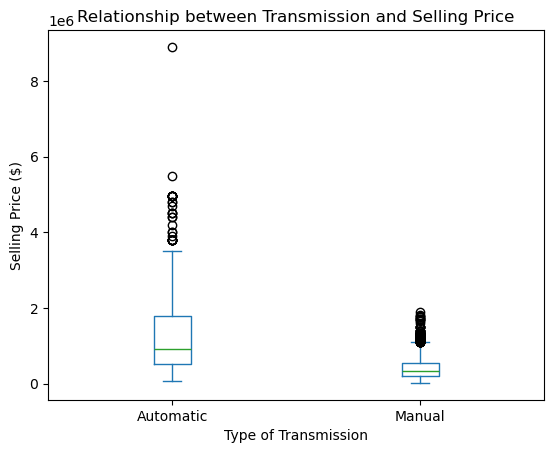

In [19]:
#Correlation 4: Transmission and Selling Price
plt.figure(figsize=(10,8))

cars.plot.box(column='selling_price', by='transmission')
plt.title("Relationship between Transmission and Selling Price")
plt.xlabel('Type of Transmission')
plt.ylabel('Selling Price ($)')
plt.show()

# Correlation 4: Transmission and Selling Price

## Observations and Explanations:

- **Median**: Automatic transmission vehicles have a higher median selling price compared to manual transmission vehicles.

- **Interquartile Range (IQR)**: The IQR for automatic cars is significantly larger than that for manual cars, indicating more variability in selling prices for automatics.

- **Skewness and Outliers**:
  - **Automatic**: The distribution is not symmetric and shows a positive skew, suggesting that higher-priced outliers are present.
  - **Manual**: The distribution is also not symmetric and exhibits a positive skew, with some high-priced outliers.

- Both transmission types have outliers, but the automatic vehicles show a larger range and spread of prices.

## Overall Summary:

Automatic cars generally command a higher median selling price than manual transmission cars. The greater variability in selling prices for automatic vehicles, as indicated by the larger IQR, suggests that there is a wider range of prices for automatics. Both types exhibit outliers, particularly at the higher end of the price spectrum, indicating the presence of a few high-priced vehicles in both categories.


<Figure size 1000x800 with 0 Axes>

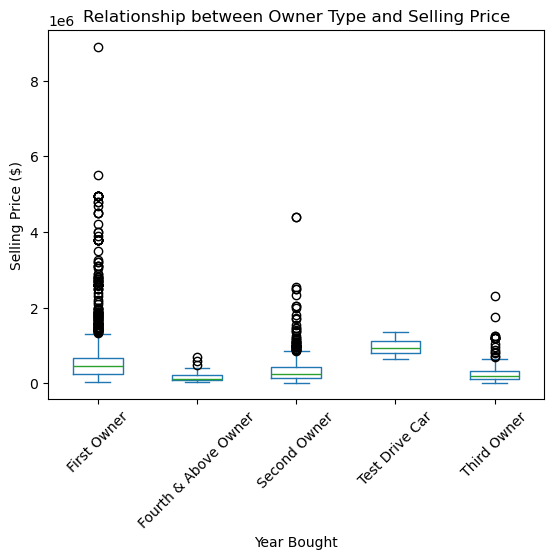

In [20]:
#Correlation 5: Owner and Selling Price
plt.figure(figsize=(10,8))

cars.plot.box(column='selling_price', by='owner')
plt.title("Relationship between Owner Type and Selling Price")
plt.xlabel('Year Bought')
plt.ylabel('Selling Price ($)')
plt.xticks(rotation=45)
plt.show()

# Correlation 5: Owner and Selling Price

## Observations and Explanations:

- **Median**: The median selling price for all owner categories is similar, with first-owner vehicles showing a slightly higher median.

- **Interquartile Range (IQR)**: The first owner has the highest IQR, indicating more variability in prices. The IQR decreases for each subsequent owner, suggesting less variability in prices as ownership changes.

- **Skewness and Outliers**:
  - **First Owner**: The distribution is symmetric with a positive skew, indicating that while most values are clustered, there are higher-priced outliers.
  - **Second Owner**: The distribution is also symmetric with a positive skew.
  - **Third Owner**: The distribution is not applicable (N/A) for detailed analysis, but it also shows a positive skew.

## Overall Summary:

Vehicles with a first owner tend to exhibit greater variability in selling prices and have higher extreme prices compared to vehicles with subsequent owners. As the number of owners increases, the price range narrows, leading to a more concentrated set of prices, indicating a lower perceived value as ownership changes.


## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [22]:
#Q4 Part 1. Removing all owners not including "First, second and third owner"
cars= cars[cars['owner']!="Fourth & Above Owner" ]
cars= cars[cars['owner']!="Test Drive Car" ]
print(cars['owner'].nunique())

3


In [23]:
#Q4 Part 2. Removing all other Fuel types other than "Diesel or Petrol Only"
cars= cars[cars['fuel']!='Electric' ]
cars= cars[cars['fuel']!='CNG' ]
cars= cars[cars['fuel']!='LPG' ]
print(cars['fuel'].nunique())

2


In [24]:
#Q4 Part 3. Removing all other Seller types other than "Dealer or Individual Only"
cars= cars[cars['seller_type']!='Trustmark Dealer' ]
print(cars['seller_type'].nunique())

2


In [25]:
#Q4 Part 4. Printing the Length of the Data.
print("New Length of Car Sales:", len(cars))

New Length of Car Sales: 3657
